In [1]:
!pwd

/home/viluiz/PhD_work/ReactiveTransport/TestCase1.CationExchange/dataset_MonteCarlo_zeros_500.000


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl


In [4]:
pd.__version__

'1.4.1'

In [5]:
df = pd.read_csv('dataset_CationExchange.csv')

In [6]:
df

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.000000,0.000000,1.006692,0.000000,0.000000,1.480949,1.185818,1.338613,0.000000,0.450913,0.029480,NaN,0.9477,NaN,NaN
1,0.000000,0.407657,0.429857,0.000000,0.004748,0.330768,0.923985,0.985110,0.399244,1.294644,0.006891,0.4077,0.3902,0.02585,0.004748
2,0.296809,0.225889,0.000000,0.671699,1.064199,1.108336,0.058346,0.916487,0.440374,0.000000,0.313800,0.2259,0.0118,0.62590,1.064000
3,0.941531,0.000000,0.000000,0.000000,1.491581,1.075640,0.000000,0.000000,0.483800,0.651787,0.926500,NaN,NaN,0.03012,1.492000
4,1.101189,0.582616,0.000000,0.754495,0.976864,0.576764,0.514505,0.000000,0.744728,0.000000,1.093000,0.5826,NaN,0.77070,0.976900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.569629,0.000000,1.154181,0.241989,0.000000,0.000000,0.000000,0.000000,0.934066,0.379590,0.136000,NaN,1.1160,1.14700,NaN
499996,0.022634,0.000000,0.968718,0.000000,0.000000,0.000000,1.436788,0.000000,0.374976,0.700517,0.000041,NaN,0.6718,0.34210,NaN
499997,0.000000,1.233910,0.317111,0.131313,0.175559,1.244248,0.000000,1.240287,0.233474,0.000000,0.021620,1.2340,0.3049,0.10030,0.175600
499998,0.623557,0.000000,1.039785,0.619939,0.000000,0.591174,0.000000,0.727133,0.283493,0.734546,0.638700,NaN,1.0350,0.59440,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0_Ca    500000 non-null  float64
 1   0_Cl    500000 non-null  float64
 2   0_Na    500000 non-null  float64
 3   0_K     500000 non-null  float64
 4   0_N5    500000 non-null  float64
 5   1_Ca    500000 non-null  float64
 6   1_Cl    500000 non-null  float64
 7   1_Na    500000 non-null  float64
 8   1_K     500000 non-null  float64
 9   1_N5    500000 non-null  float64
 10  out_Ca  431924 non-null  float64
 11  out_Cl  321209 non-null  float64
 12  out_Na  432194 non-null  float64
 13  out_K   432282 non-null  float64
 14  out_N5  321182 non-null  float64
dtypes: float64(15)
memory usage: 57.2 MB


In [8]:
df[df.isna().any(axis=1)]

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.000000,0.000000,1.006692,0.000000,0.000000,1.480949,1.185818,1.338613,0.000000,0.450913,0.029480,NaN,0.94770,NaN,NaN
3,0.941531,0.000000,0.000000,0.000000,1.491581,1.075640,0.000000,0.000000,0.483800,0.651787,0.926500,NaN,NaN,0.03012,1.4920
4,1.101189,0.582616,0.000000,0.754495,0.976864,0.576764,0.514505,0.000000,0.744728,0.000000,1.093000,0.5826,NaN,0.77070,0.9769
5,0.000000,0.000000,0.000000,0.312785,0.845316,0.000000,0.000000,0.000000,0.000000,1.300859,NaN,NaN,NaN,NaN,NaN
6,0.884873,0.604923,0.754435,0.000000,0.130375,0.450269,1.414456,0.000000,0.000000,1.000050,0.890400,0.6049,0.74350,NaN,0.1304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,1.342958,0.831255,0.000000,0.086605,0.000000,0.000000,1.297186,0.217754,0.832956,0.000000,0.832400,0.8313,0.05374,1.05400,NaN
499994,1.431891,0.000000,0.592392,0.752712,0.000000,0.134606,0.000000,0.000000,0.000000,0.000000,1.456000,NaN,0.58570,0.71170,NaN
499995,0.569629,0.000000,1.154181,0.241989,0.000000,0.000000,0.000000,0.000000,0.934066,0.379590,0.136000,NaN,1.11600,1.14700,NaN
499996,0.022634,0.000000,0.968718,0.000000,0.000000,0.000000,1.436788,0.000000,0.374976,0.700517,0.000041,NaN,0.67180,0.34210,NaN


In [11]:
df.describe()

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.500999,0.500374,0.499773,0.500240,0.500299,0.498474,0.499304,0.499607,0.500650,0.500502,0.411612,0.481798,0.546737,0.557932,0.481626
std,0.500383,0.499990,0.500076,0.499975,0.500067,0.499832,0.499973,0.500023,0.500335,0.500488,0.452857,0.499643,0.537377,0.530457,0.499750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016890,0.000000,0.015340,0.051260,0.000000
50%,0.376859,0.375988,0.373897,0.375592,0.375678,0.371368,0.373523,0.374196,0.375701,0.374492,0.198550,0.332800,0.422000,0.444150,0.332100
75%,0.939090,0.937706,0.937775,0.937778,0.937559,0.935641,0.937470,0.936179,0.939295,0.938050,0.757400,0.916100,0.985200,0.963500,0.916100
max,1.499998,1.500000,1.499998,1.499992,1.499999,1.499998,1.499998,1.499999,1.499998,1.500000,1.544000,1.500000,2.562000,2.441000,1.500000


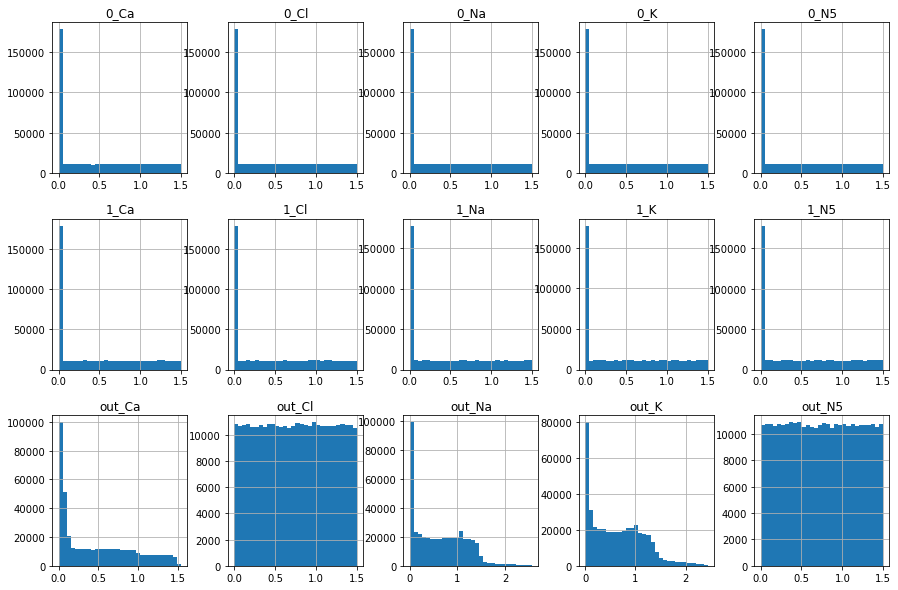

In [10]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

df.hist(alpha=1.,figsize = (15,10), layout=(3,5), bins=30);

In [11]:
df_corr_matrix = df.corr()
df_corr_matrix
df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

/tmp/ipykernel_16237/2324509408.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)


,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0_Ca,1.0000,0.0014,-0.0010,-0.0006,-0.0038,0.0004,0.0021,0.0007,-0.0006,0.0000,0.9229,0.0017,0.0992,0.2304,-0.0030
0_Cl,0.0014,1.0000,-0.0033,0.0012,-0.0007,0.0013,-0.0006,0.0003,0.0008,0.0003,0.0002,1.0000,-0.0024,0.0017,0.0018
0_Na,-0.0010,-0.0033,1.0000,0.0001,-0.0005,0.0016,0.0005,0.0000,-0.0009,-0.0006,0.0108,-0.0024,0.8745,0.0285,-0.0007
0_K,-0.0006,0.0012,0.0001,1.0000,-0.0000,-0.0017,0.0022,0.0025,0.0009,0.0021,0.0479,0.0015,0.0468,0.8053,-0.0005
0_N5,-0.0038,-0.0007,-0.0005,-0.0000,1.0000,-0.0007,0.0006,-0.0013,0.0007,-0.0013,-0.0033,-0.0020,-0.0013,0.0003,1.0000
1_Ca,0.0004,0.0013,0.0016,-0.0017,-0.0007,1.0000,-0.0010,-0.0008,0.0006,-0.0004,0.1128,-0.0012,-0.1566,-0.2295,0.0005
1_Cl,0.0021,-0.0006,0.0005,0.0022,0.0006,-0.0010,1.0000,-0.0013,0.0009,0.0017,0.0004,0.0001,0.0016,0.0033,-0.0012
1_Na,0.0007,0.0003,0.0000,0.0025,-0.0013,-0.0008,-0.0013,1.0000,0.0007,0.0010,-0.0159,0.0021,-0.0211,-0.0607,-0.0008
1_K,-0.0006,0.0008,-0.0009,0.0009,0.0007,0.0006,0.0009,0.0007,1.0000,0.0005,-0.0342,0.0015,-0.1320,0.0766,-0.0008
1_N5,0.0000,0.0003,-0.0006,0.0021,-0.0013,-0.0004,0.0017,0.0010,0.0005,1.0000,-0.0002,-0.0004,-0.0019,0.0016,0.0000


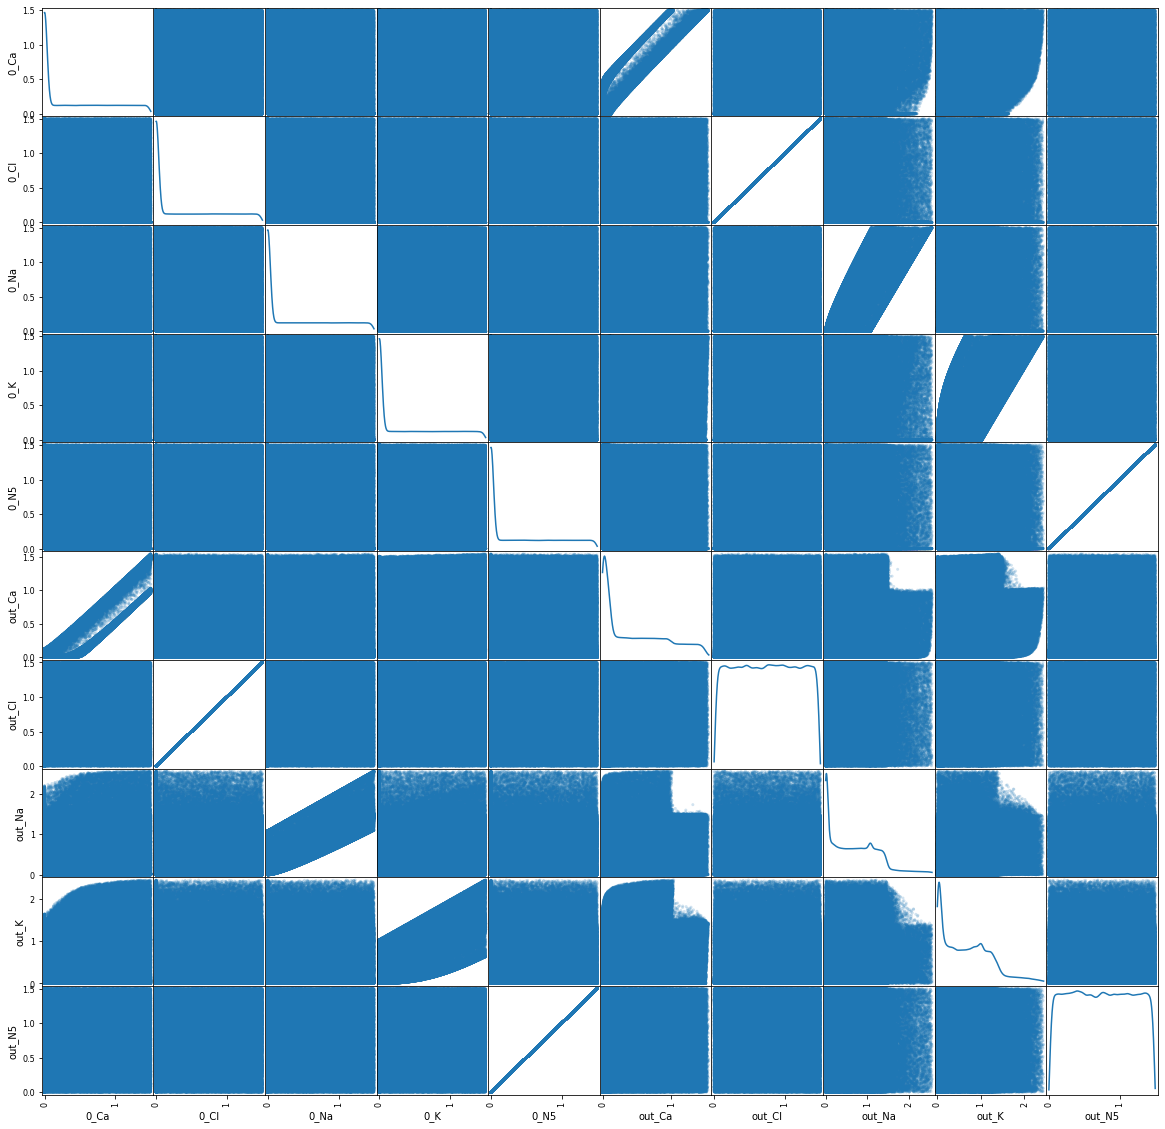

In [12]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[0,1,2,3,4,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));

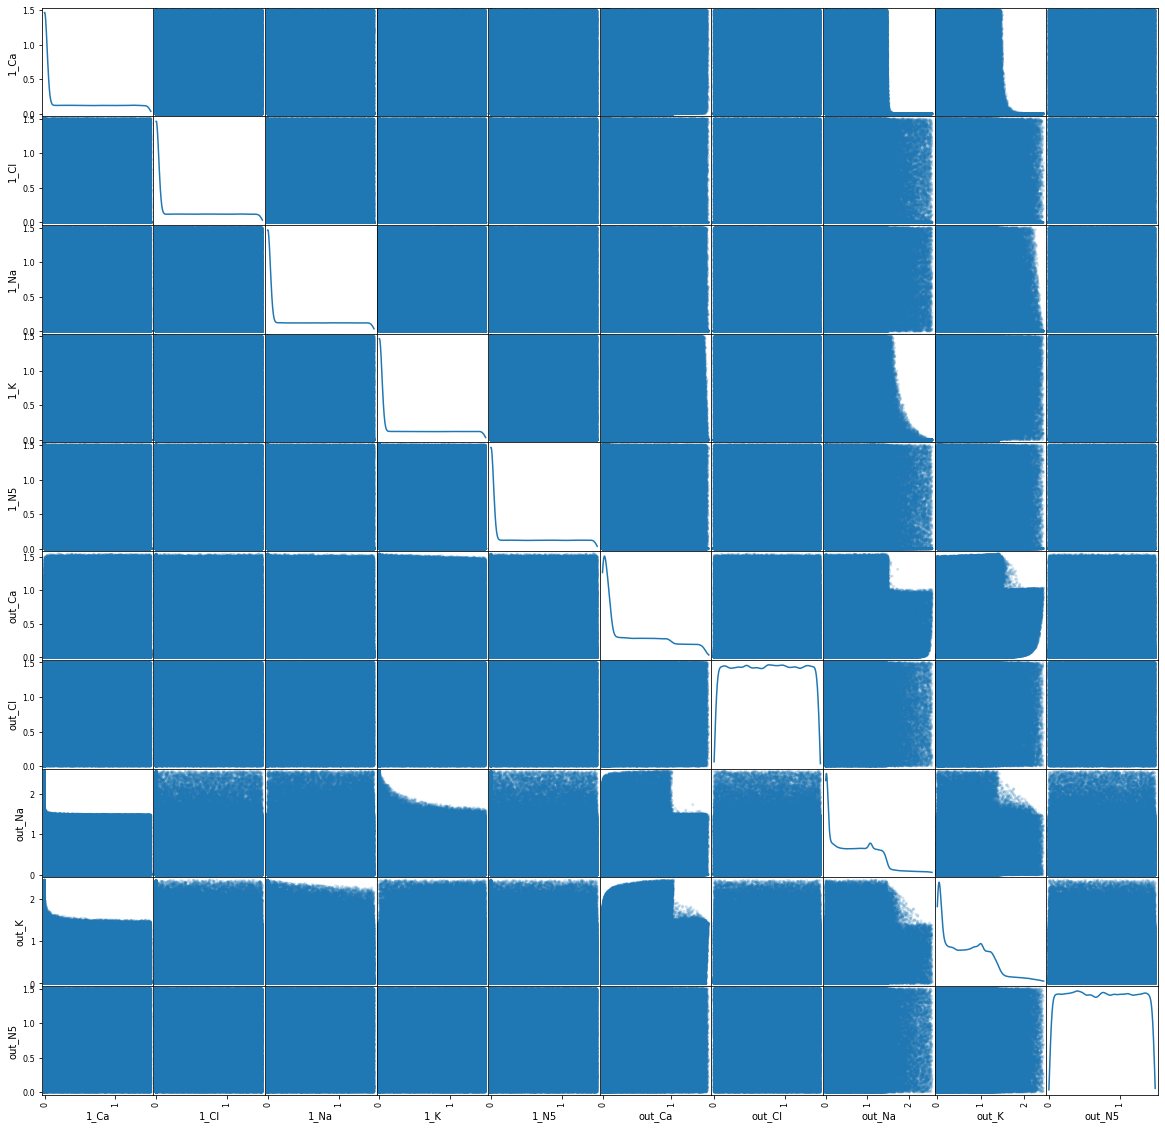

In [13]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[5,6,7,8,9,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));